# EDA y procesamiento inicial
- Tipos de características.
- Tratamiento de nulos/valores faltantes.
- Tratamiento de outliers
- Limieza en general.

In [34]:
! pip install holidays
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

df = pd.read_csv("data/stickers/train.csv")
df

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 10.2 MB/s eta 0:00:00


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [35]:
# quitamos el id
df.drop(columns=["id"], inplace=True)

In [36]:
df.describe()

,num_sold
count,221259.000000
mean,752.527382
std,690.165445
min,5.000000
25%,219.000000
50%,605.000000
75%,1114.000000
max,5939.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.8+ MB


In [38]:
df["date"] = pd.to_datetime(df["date"])
df

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [39]:
df["country"].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [40]:
df["product"].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [41]:
df["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [42]:
# PORCENTAJE DE VALORES NULOS
df.isna().sum()/len(df)

date        0.000000
country     0.000000
store       0.000000
product     0.000000
num_sold    0.038548
dtype: float64

In [43]:
# Dónde tenemos valores nulos?
nan_vals = df[df.isna().any(axis=1)]

print("VALORES PARA LOS QUE NO TENEMOS INFORMACIÓN")
print(nan_vals.country.unique())
print(nan_vals.store.unique())
print(nan_vals["product"].unique())

VALORES PARA LOS QUE NO TENEMOS INFORMACIÓN
['Canada' 'Kenya']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kerneler' 'Kerneler Dark Mode']


In [44]:
# count nan by country
nan_by_country = df[df.isna().any(axis=1)].groupby("country").count()/df.groupby("country").count()
nan_by_country

,date,store,product,num_sold
country,,,,
Canada,0.110703,0.110703,0.110703,0.0
Finland,NaN,NaN,NaN,NaN
Italy,NaN,NaN,NaN,NaN
Kenya,0.120584,0.120584,0.120584,0.0
Norway,NaN,NaN,NaN,NaN
Singapore,NaN,NaN,NaN,NaN


In [45]:
# Solo hay valores nan en la variable objetivo, se pueden eliminar
# podemos probar a imputar y eliminar y comprobar la performance
# df.dropna(inplace=True)

In [ ]:
# sns.lineplot(df, x="date", y="num_sold", hue="country")

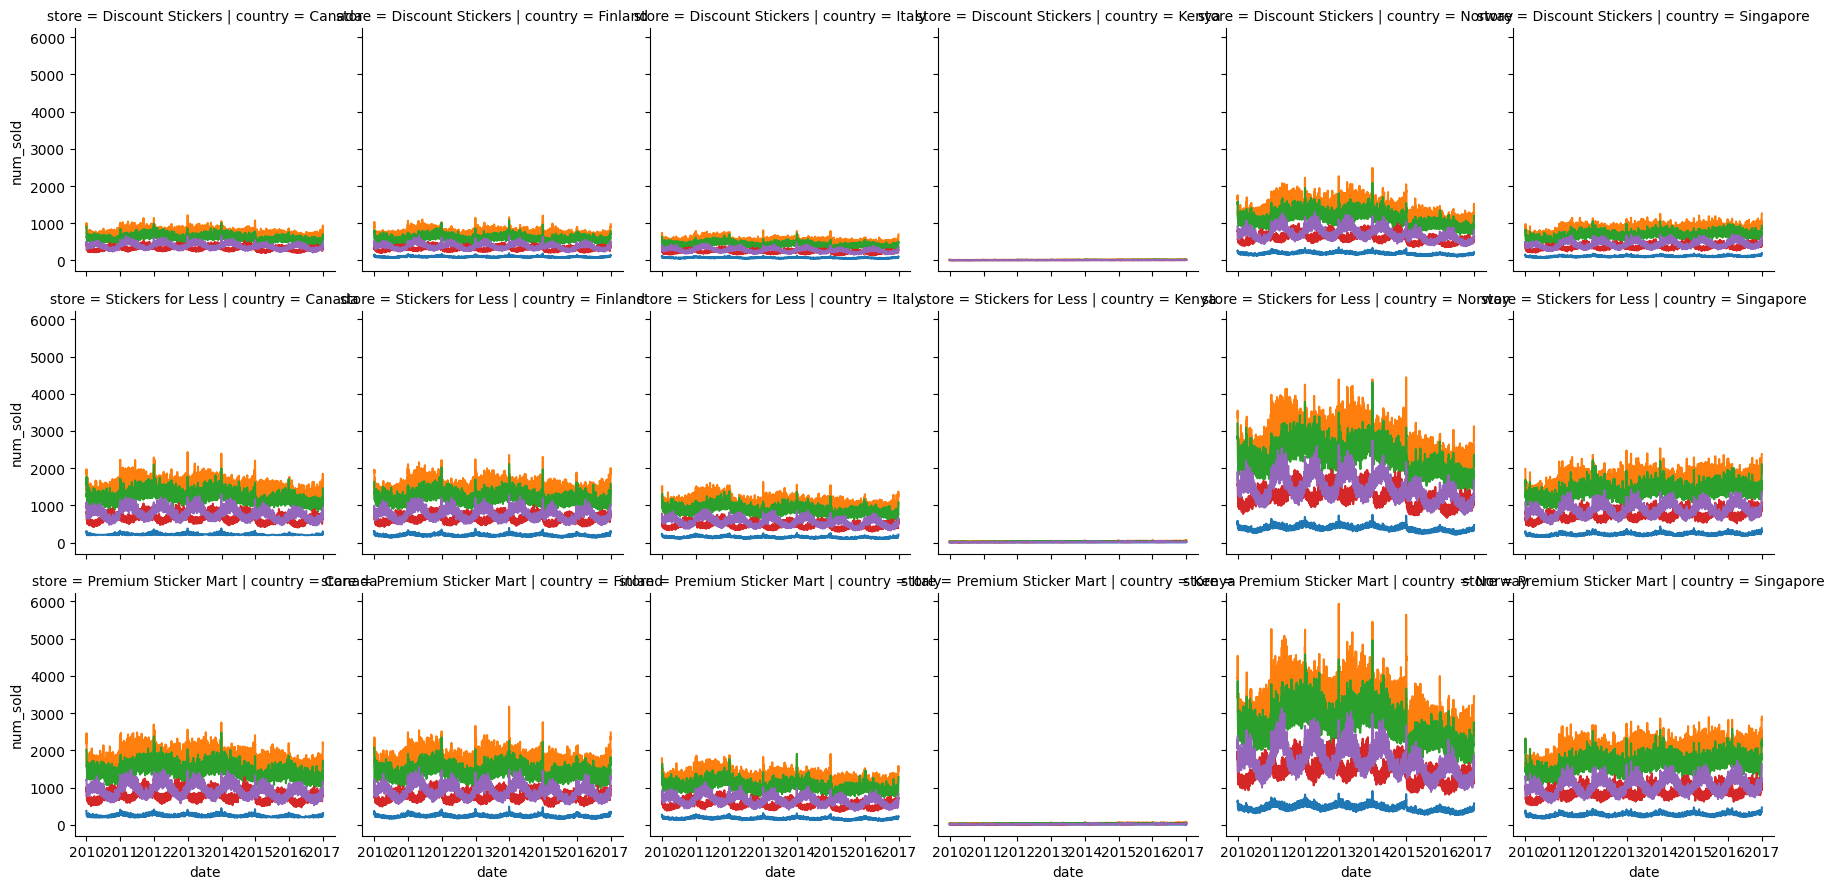

In [47]:
g = sns.FacetGrid(df, col="country", row="store", hue="product")
g.map(sns.lineplot, "date", "num_sold")


- Qué ocurre con Kenia y Norway? tienene comportamientos diferentes al resto de países
- Outliers?
- A qué corresponden los ciclos?

,date,country,store,product,num_sold
98640,2013-01-01,Canada,Discount Stickers,Holographic Goose,NaN
98641,2013-01-01,Canada,Discount Stickers,Kaggle,810.0
98642,2013-01-01,Canada,Discount Stickers,Kaggle Tiers,667.0
98643,2013-01-01,Canada,Discount Stickers,Kerneler,345.0
98644,2013-01-01,Canada,Discount Stickers,Kerneler Dark Mode,411.0
...,...,...,...,...,...
131485,2013-12-31,Singapore,Premium Sticker Mart,Holographic Goose,346.0
131486,2013-12-31,Singapore,Premium Sticker Mart,Kaggle,2328.0
131487,2013-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,1760.0
131488,2013-12-31,Singapore,Premium Sticker Mart,Kerneler,970.0


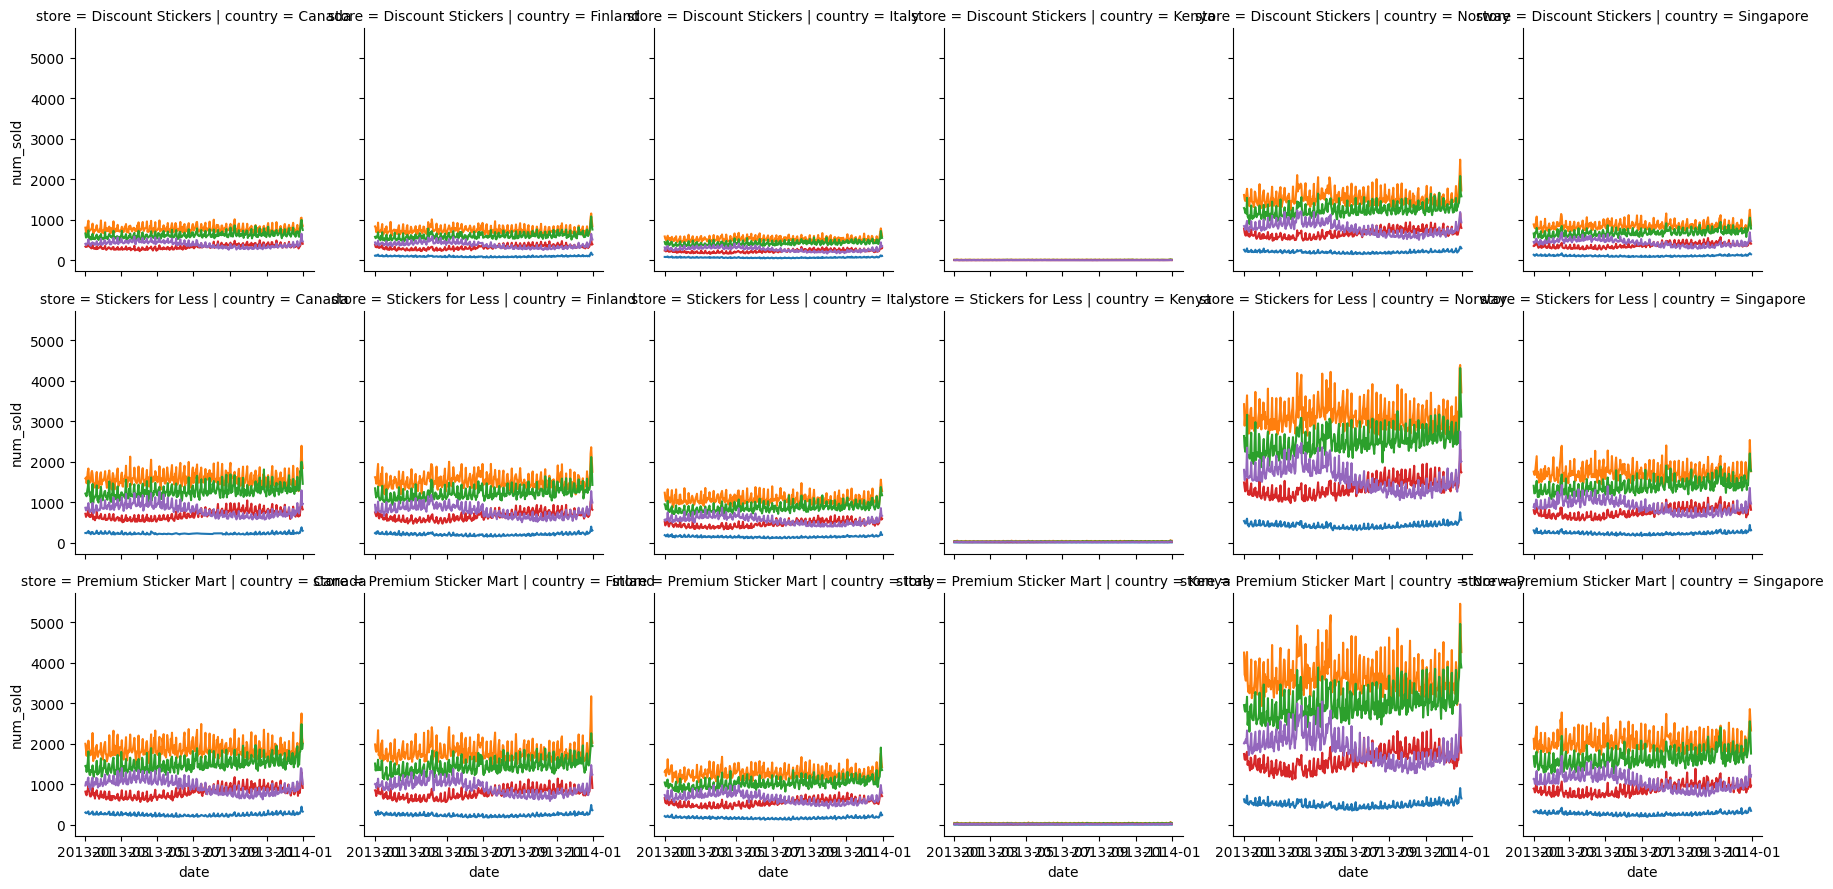

In [48]:
# zoom in, visualizar solo un ciclo o dos de la serie
df["date"].min(), df["date"].max()
df_reduced = df[(df["date"].dt.year > 2012) & (df["date"].dt.year < 2014)]


g = sns.FacetGrid(df_reduced, col="country", row="store", hue="product")
g.map(sns.lineplot, "date", "num_sold")

df_reduced

## Feature engineering

In [ ]:
# crear características basadas en la fecha (vacaciones, fines de semana, etc.)

In [90]:
# crear características: mes y estación
import holidays

season_map = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Autumn"
}

def is_holiday(row):
    country = row["country"]
    date = row["date"]

    country_codes = {
        "Canada":"CA",
        "Finland":"FI",
        "Norway":"NO",
        "Kenya":"KE",
        "Italy":"IT",
        "Singapore":"SG",
    }
    return 1 if date in holidays.country_holidays(country_codes.get(country)) else 0

df["month"] = df["date"].dt.month
df["season"] = (df["month"]%12 + 3)//3
df["season"] = df["season"].map(season_map)
df["year"] = df["date"].dt.year
df["day of week"] = df["date"].dt.dayofweek
df["weekend"] = df["day of week"].apply(lambda x:1 if x>4 else 0)
df["holiday"] = df.apply(lambda row: is_holiday(row), axis=1)

df

,date,country,store,product,num_sold,month,season,year,day of week,weekend,holiday,gdp
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,1,Winter,2010,4,0,1,47560.666601
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,Winter,2010,4,0,1,47560.666601
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,Winter,2010,4,0,1,47560.666601
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,Winter,2010,4,0,1,47560.666601
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,Winter,2010,4,0,1,47560.666601
...,...,...,...,...,...,...,...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,12,Winter,2016,5,1,0,56899.918181
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,12,Winter,2016,5,1,0,56899.918181
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,12,Winter,2016,5,1,0,56899.918181
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,12,Winter,2016,5,1,0,56899.918181


<Axes: xlabel='season', ylabel='num_sold'>

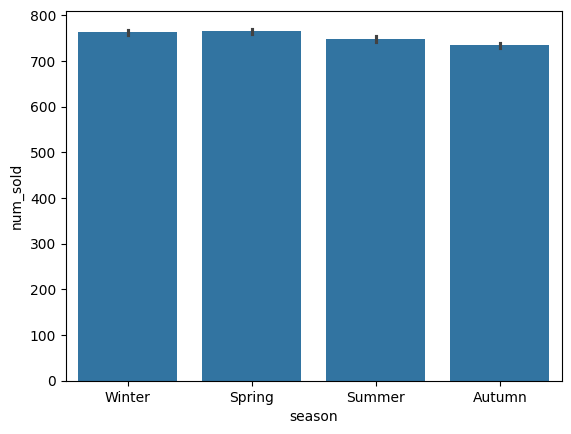

In [16]:
sns.barplot(df, x="season", y="num_sold")

<Axes: xlabel='month', ylabel='num_sold'>

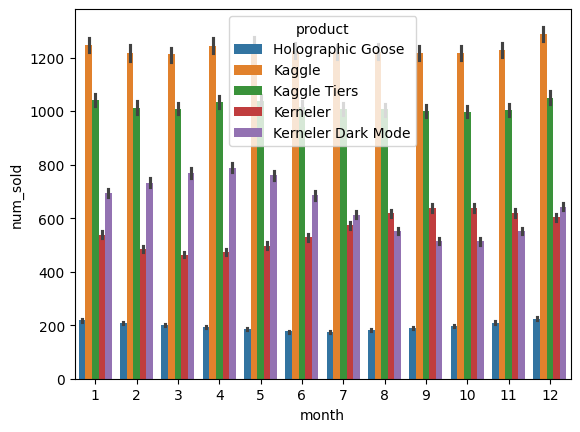

In [17]:
sns.barplot(df, x="month", y="num_sold", hue="product")

<Axes: xlabel='day of week', ylabel='num_sold'>

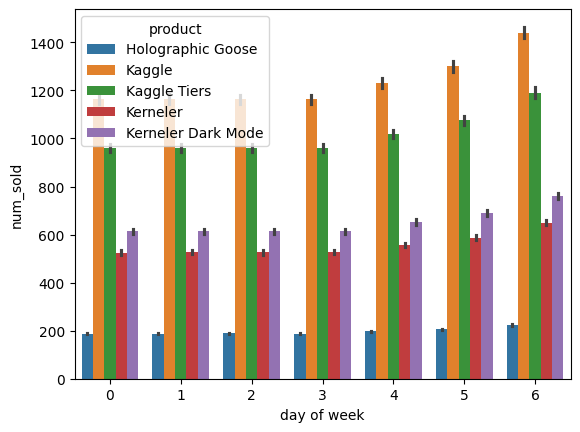

In [53]:
sns.barplot(df, x="day of week", y="num_sold", hue="product")
# Las ventas aumentan los fines de semana

<Axes: xlabel='weekend', ylabel='num_sold'>

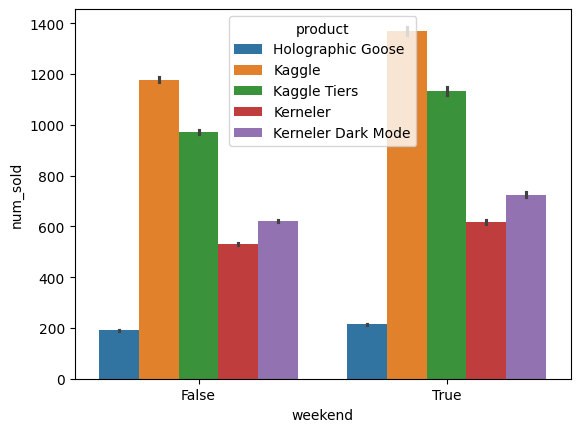

In [55]:
sns.barplot(df, x="weekend", y="num_sold", hue="product")

<Axes: xlabel='holiday', ylabel='num_sold'>

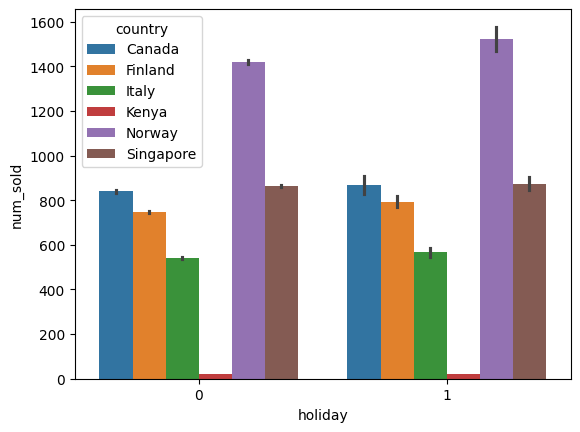

In [ ]:
sns.barplot(df, x="holiday", y="num_sold", hue="country")

In [82]:
# compoarar la evolución de ventas con el gdp de cada país
gdp_df = pd.read_csv("data/stickers/gdp_worldbank_full.csv")
gdp_df

#gdp_df=gdp_df.swapaxes(0,1)

gdp_df=gdp_df.reset_index().rename(columns={"index":"country"}).melt(id_vars=["country"], var_name="year", value_name="gdp")
gdp_df["year"] = gdp_df["year"].astype(int)
df = pd.merge(df, gdp_df, on=["country","year"])

df


,date,country,store,product,num_sold,month,season,year,day of week,weekend,holiday,gdp
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,1,Winter,2010,4,False,1,47560.666601
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,Winter,2010,4,False,1,47560.666601
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,Winter,2010,4,False,1,47560.666601
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,Winter,2010,4,False,1,47560.666601
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,Winter,2010,4,False,1,47560.666601
...,...,...,...,...,...,...,...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,12,Winter,2016,5,True,0,56899.918181
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,12,Winter,2016,5,True,0,56899.918181
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,12,Winter,2016,5,True,0,56899.918181
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,12,Winter,2016,5,True,0,56899.918181


## Correlation Analysis

In [92]:
# Analyzing if there is a correlation between the GDP and the number of stickers sold
# Select only numeric columns
df_numeric = df.select_dtypes(include=["float64", "int64","int"])
df_numeric.corr().style.background_gradient(cmap='coolwarm')

,num_sold,month,year,day of week,weekend,holiday,gdp
num_sold,1.000000,-0.006255,-0.040462,0.069613,0.072310,0.011670,0.609414
month,-0.006255,1.000000,-0.000513,-0.003208,-0.002996,-0.002638,0.000050
year,-0.040462,-0.000513,1.000000,0.000098,-0.000247,-0.001575,-0.070975
day of week,0.069613,-0.003208,0.000098,1.000000,0.790423,0.008363,-0.000151
weekend,0.072310,-0.002996,-0.000247,0.790423,1.000000,0.003503,0.000047
holiday,0.011670,-0.002638,-0.001575,0.008363,0.003503,1.000000,0.006326
gdp,0.609414,0.000050,-0.070975,-0.000151,0.000047,0.006326,1.000000


In [97]:
# analyzing canibalization between products
df.pivot(index="date",columns=["product","country","store"],values="num_sold")#corr().style.background_gradient(cmap='coolwarm')

product,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode,...,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode
country,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,...,Singapore,Singapore,Singapore,Singapore,Singapore,Singapore,Singapore,Singapore,Singapore,Singapore
store,Discount Stickers,Discount Stickers,Discount Stickers,Discount Stickers,Discount Stickers,Stickers for Less,Stickers for Less,Stickers for Less,Stickers for Less,Stickers for Less,...,Stickers for Less,Stickers for Less,Stickers for Less,Stickers for Less,Stickers for Less,Premium Sticker Mart,Premium Sticker Mart,Premium Sticker Mart,Premium Sticker Mart,Premium Sticker Mart
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,973.0,906.0,423.0,491.0,300.0,1837.0,1659.0,807.0,940.0,...,301.0,1981.0,1565.0,841.0,1080.0,317.0,2112.0,1992.0,1045.0,1255.0
2010-01-02,NaN,881.0,854.0,440.0,437.0,281.0,1972.0,1541.0,783.0,1068.0,...,268.0,1763.0,1689.0,781.0,971.0,364.0,2322.0,1938.0,1010.0,1224.0
2010-01-03,NaN,1003.0,839.0,417.0,495.0,297.0,1936.0,1770.0,832.0,1087.0,...,289.0,1801.0,1690.0,813.0,987.0,388.0,2253.0,2315.0,1040.0,1314.0
2010-01-04,NaN,744.0,609.0,339.0,441.0,235.0,1382.0,1243.0,646.0,778.0,...,256.0,1543.0,1205.0,602.0,839.0,269.0,1760.0,1656.0,846.0,927.0
2010-01-05,NaN,707.0,640.0,290.0,372.0,240.0,1416.0,1319.0,612.0,772.0,...,226.0,1364.0,1352.0,629.0,795.0,264.0,1536.0,1410.0,770.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,694.0,577.0,298.0,372.0,233.0,1518.0,1104.0,612.0,708.0,...,267.0,1948.0,1483.0,853.0,1016.0,351.0,2169.0,1906.0,1079.0,1179.0


In [106]:
# Aquí no se ve mucho :/
#df.pivot(index="date",columns=["product","country","store"],values="num_sold").corr().style.background_gradient(cmap='coolwarm')

In [ ]:
df.pivot_table(index="date",columns="product",values="num_sold",aggfunc="mean").corr().style.background_gradient(cmap='coolwarm') 
# tanto con la media como con la media como con la suma (ventas totales) sale parecido

product,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode
product,,,,,
Holographic Goose,1.000000,0.761823,0.722110,0.534253,0.494888
Kaggle,0.761823,1.000000,0.861064,0.645148,0.594325
Kaggle Tiers,0.722110,0.861064,1.000000,0.585422,0.600828
Kerneler,0.534253,0.645148,0.585422,1.000000,-0.143614
Kerneler Dark Mode,0.494888,0.594325,0.600828,-0.143614,1.000000


In [107]:
# pruebo con combinaciones de 2
df.pivot_table(index="date",columns=["store","product"],values="num_sold",aggfunc="mean").corr().style.background_gradient(cmap='coolwarm') 


In [105]:
df.pivot_table(index="date",columns=["country","product"],values="num_sold",aggfunc="mean").corr().style.background_gradient(cmap='coolwarm') 
